In [1]:
# Predicting: Effective resource planning and strategising relies on knowledge of the velocity and
# veracity of viral spread. Subtle differences between nations have been evident in the changes between
# the death rate rises and falls over time allowing for targeted approaches to maximise lives saved.
# Effective planning is most important where resources are naturally the scarcest.
# Predict the future cases and death rates for 5 countries in Africa.
# Create a visualisation and a short blog explaining your modelling steps and results.

In [2]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])

In [4]:
sa_df = df.groupby('Country/Region').get_group('South Africa')
sa_df = sa_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

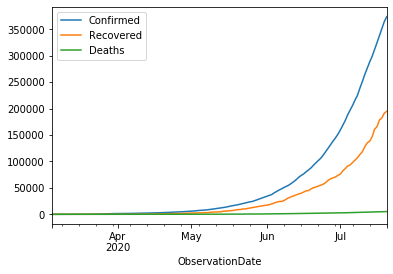

In [5]:
sa_df.plot()

In [6]:
confirmed_cases = sa_df[['Confirmed']]

In [7]:
per_change_confirmed_cases = confirmed_cases.pct_change()

In [8]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"}, inplace = True)

In [9]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


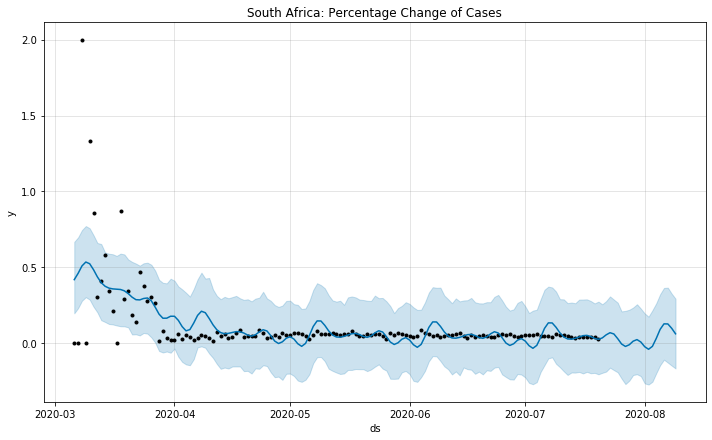

In [10]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('South Africa: Percentage Change of Cases')
plt.savefig('South_Africa_Percentage_Change_of_Cases.jpg', bbox_inches='tight')

In [11]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"},inplace = True)

In [12]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


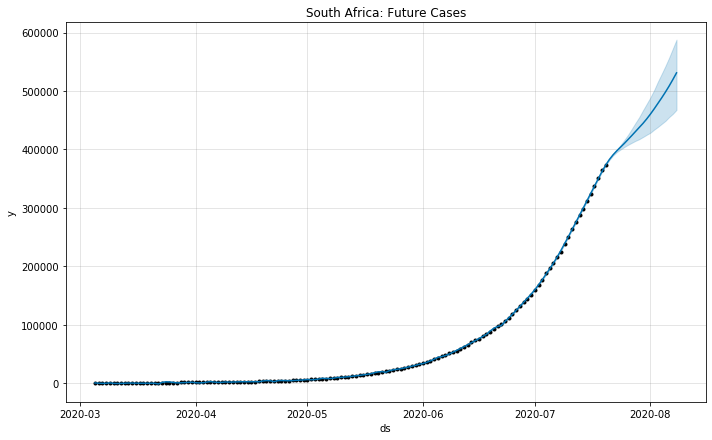

In [13]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('South Africa: Future Cases')
plt.savefig('South_Africa_Future_Cases.jpg', bbox_inches='tight')

In [14]:
eg_df = df.groupby('Country/Region').get_group('Egypt')
eg_df = eg_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

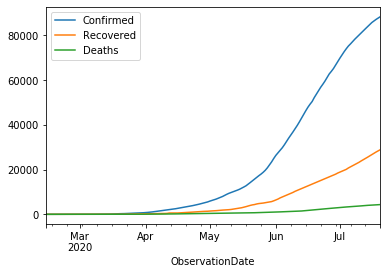

In [15]:
eg_df.plot()

In [16]:
confirmed_cases = eg_df[['Confirmed']]

In [17]:
per_change_confirmed_cases = confirmed_cases.pct_change()

In [18]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"}, inplace = True)

In [19]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


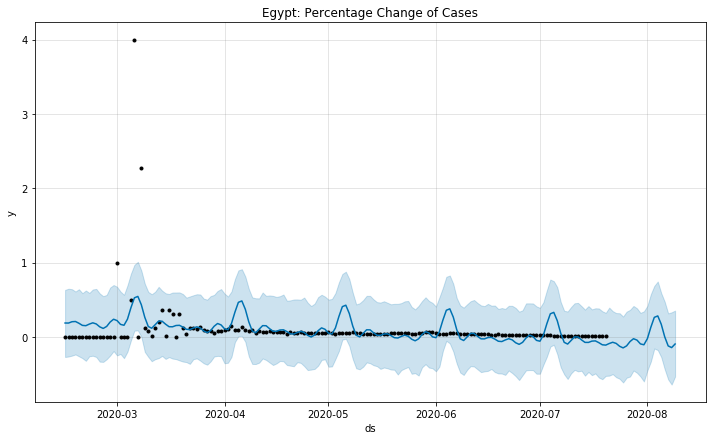

In [20]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Egypt: Percentage Change of Cases')
plt.savefig('Egypt_Percentage_Change_of_Cases.jpg', bbox_inches='tight')

In [21]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"},inplace = True)

In [22]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


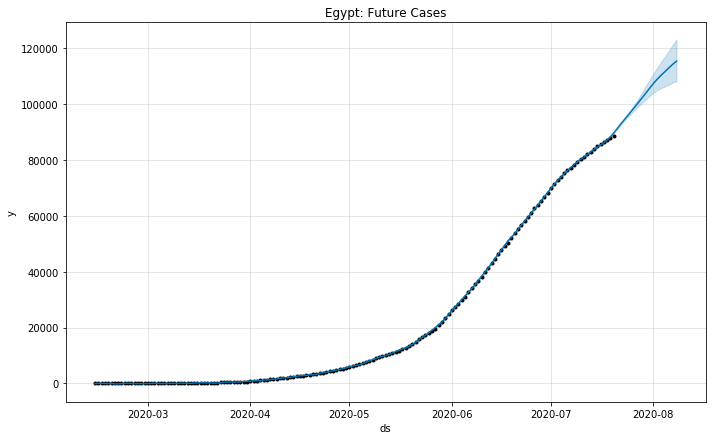

In [23]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Egypt: Future Cases')
plt.savefig('Egypt_Future_Cases.jpg', bbox_inches='tight')

In [24]:
al_df = df.groupby('Country/Region').get_group('Algeria')
al_df = al_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

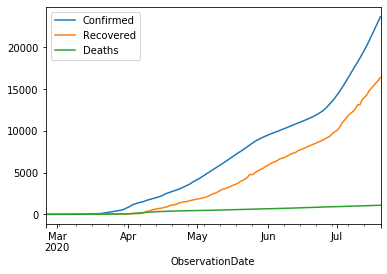

In [25]:
al_df.plot()

In [26]:
confirmed_cases = al_df[['Confirmed']]

In [27]:
per_change_confirmed_cases = confirmed_cases.pct_change()

In [28]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"}, inplace = True)

In [29]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


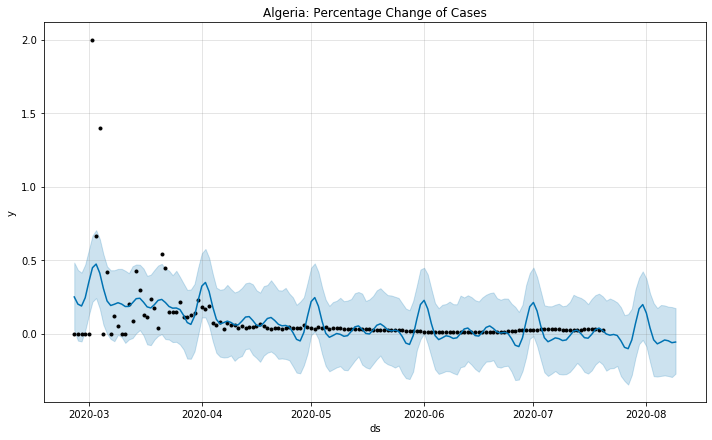

In [30]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Algeria: Percentage Change of Cases')
plt.savefig('Algeria_Percentage_Change_of_Cases.jpg', bbox_inches='tight')

In [31]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"},inplace = True)

In [32]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


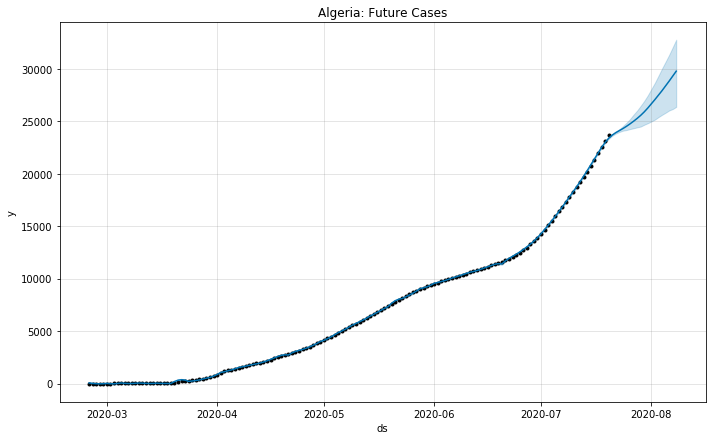

In [33]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Algeria: Future Cases')
plt.savefig('Algeria_Future_Cases.jpg', bbox_inches='tight')

In [34]:
kn_df = df.groupby('Country/Region').get_group('Kenya')
kn_df = kn_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

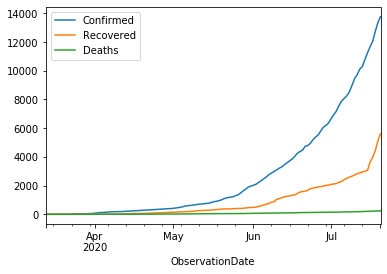

In [35]:
kn_df.plot()

In [36]:
confirmed_cases = kn_df[['Confirmed']]

In [37]:
per_change_confirmed_cases = confirmed_cases.pct_change()

In [38]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"}, inplace = True)

In [39]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


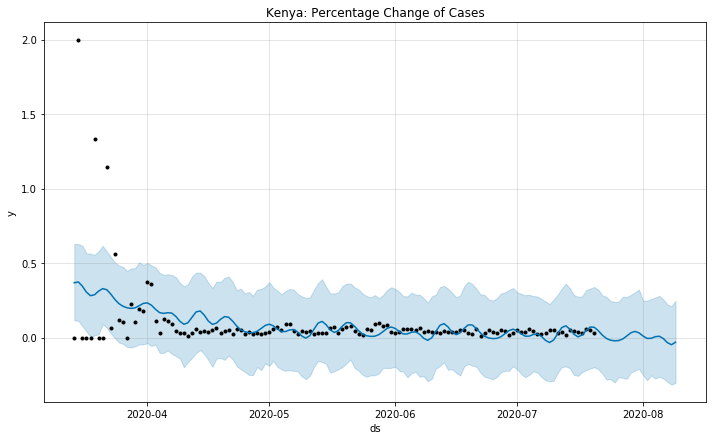

In [40]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Kenya: Percentage Change of Cases')
plt.savefig('Kenya_Percentage_Change_of_Cases.jpg', bbox_inches='tight')

In [41]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"},inplace = True)

In [42]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


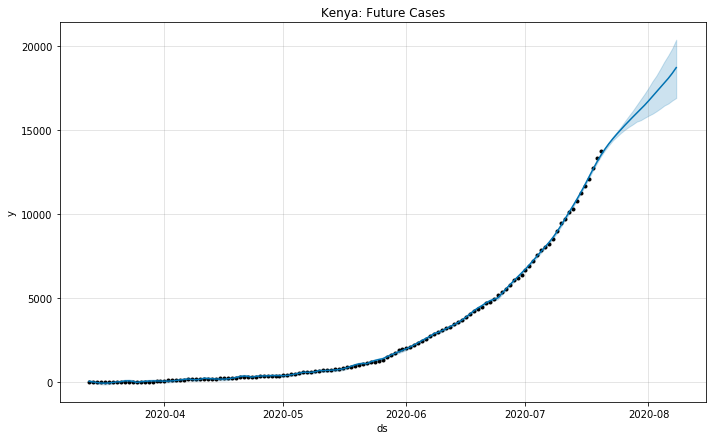

In [43]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Kenya: Future Cases')
plt.savefig('Kenya_Future_Cases.jpg', bbox_inches='tight')

In [44]:
ng_df = df.groupby('Country/Region').get_group('Nigeria')
ng_df = ng_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

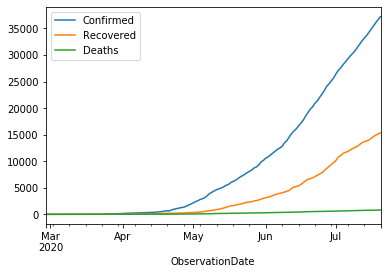

In [45]:
ng_df.plot()

In [46]:
confirmed_cases = ng_df[['Confirmed']]

In [47]:
per_change_confirmed_cases = confirmed_cases.pct_change()

In [48]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"}, inplace = True)

In [49]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


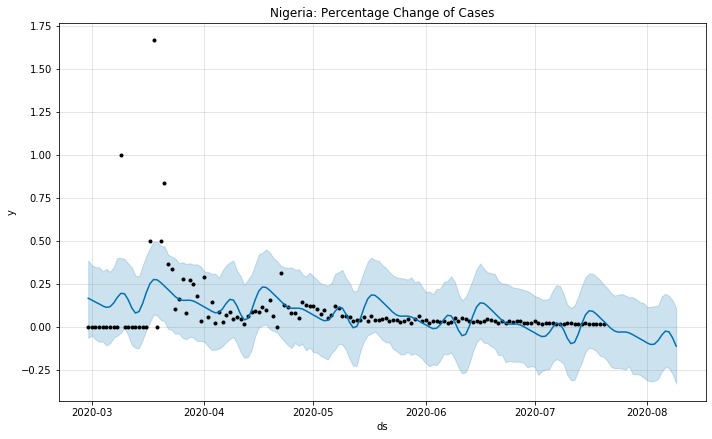

In [50]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Nigeria: Percentage Change of Cases')
plt.savefig('Nigeria_Percentage_Change_of_Cases.jpg', bbox_inches='tight')

In [51]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Confirmed":"y"},inplace = True)

In [52]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


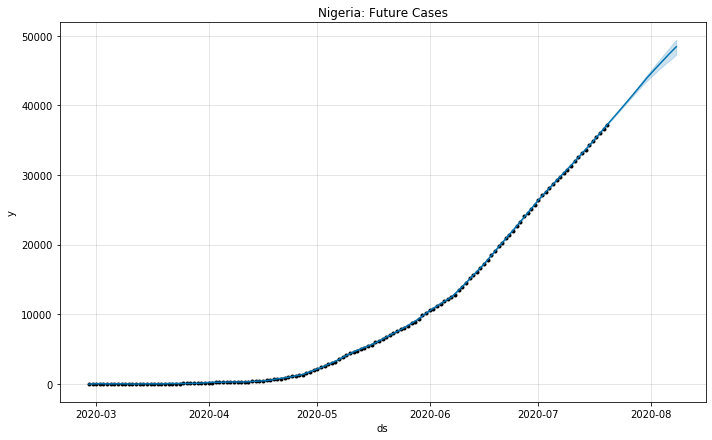

In [53]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Nigeria: Future Cases')
plt.savefig('Nigeria_Future_Cases.jpg', bbox_inches='tight')

In [54]:
sa_df = df.groupby('Country/Region').get_group('South Africa')
sa_df = sa_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

In [55]:
confirmed_cases = sa_df[['Deaths']]

In [56]:
per_change_confirmed_cases = confirmed_cases.diff()

In [57]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"}, inplace = True)

In [58]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


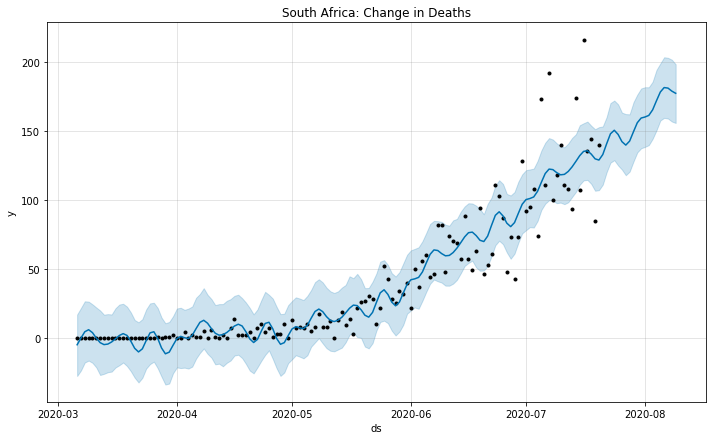

In [59]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('South Africa: Change in Deaths')
plt.savefig('South_Africa_Change_in_Deaths.jpg', bbox_inches='tight')

In [60]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"},inplace = True)

In [61]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


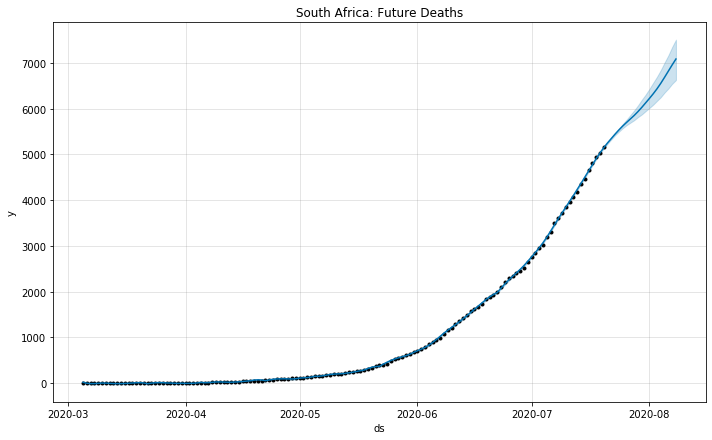

In [62]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('South Africa: Future Deaths')
plt.savefig('South_Africa_Future_Deaths.jpg', bbox_inches='tight')

In [63]:
eg_df = df.groupby('Country/Region').get_group('Egypt')
eg_df = eg_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

In [64]:
confirmed_cases = eg_df[['Deaths']]

In [65]:
per_change_confirmed_cases = confirmed_cases.diff()

In [66]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"}, inplace = True)

In [67]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


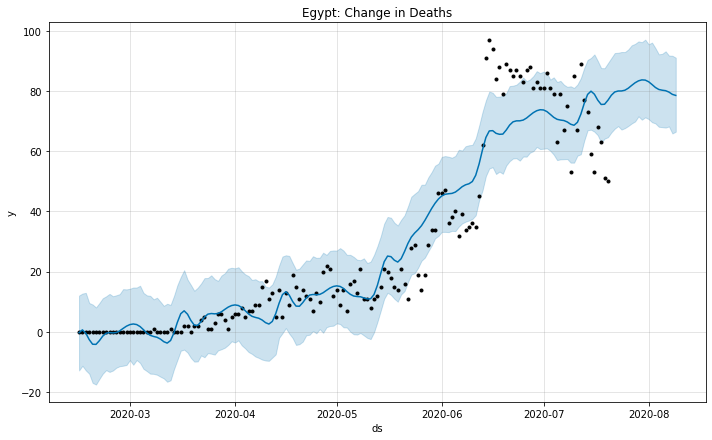

In [68]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Egypt: Change in Deaths')
plt.savefig('Egypt_Change_in_Deaths.jpg', bbox_inches='tight')

In [69]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"},inplace = True)

In [70]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


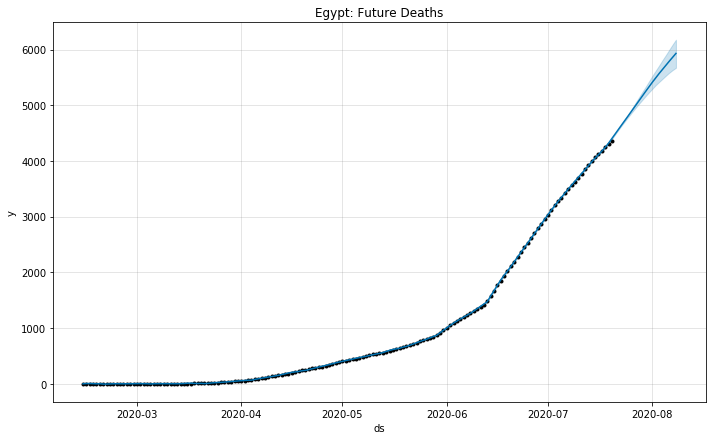

In [71]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Egypt: Future Deaths')
plt.savefig('Egypt_Future_Deaths.jpg', bbox_inches='tight')

In [72]:
al_df = df.groupby('Country/Region').get_group('Algeria')
al_df = al_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

In [73]:
confirmed_cases = al_df[['Deaths']]

In [74]:
per_change_confirmed_cases = confirmed_cases.diff()

In [75]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"}, inplace = True)

In [76]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


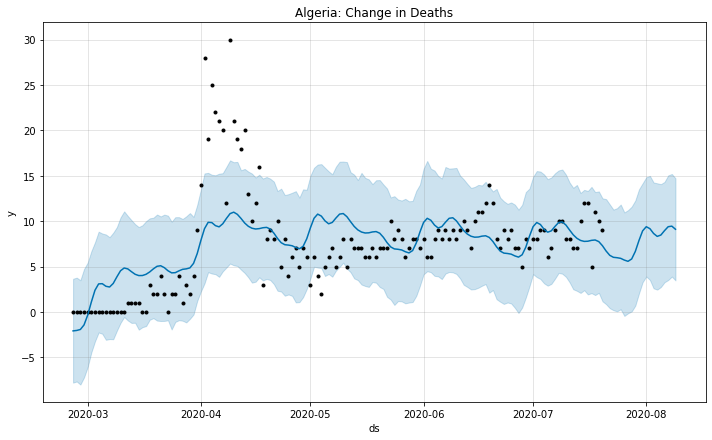

In [77]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Algeria: Change in Deaths')
plt.savefig('Algeria_Change_in_Deaths.jpg', bbox_inches='tight')

In [78]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"},inplace = True)

In [79]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


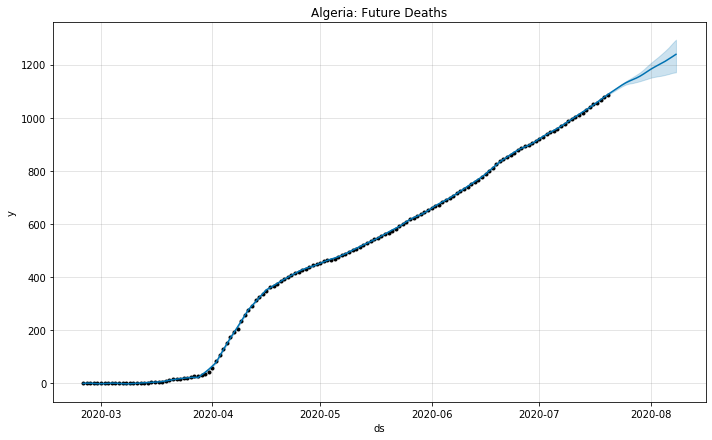

In [80]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Algeria: Future Deaths')
plt.savefig('Algeria_Future_Deaths.jpg', bbox_inches='tight')

In [81]:
kn_df = df.groupby('Country/Region').get_group('Kenya')
kn_df = kn_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

In [82]:
confirmed_cases = kn_df[['Deaths']]

In [83]:
per_change_confirmed_cases = confirmed_cases.diff()

In [84]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"}, inplace = True)

In [85]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


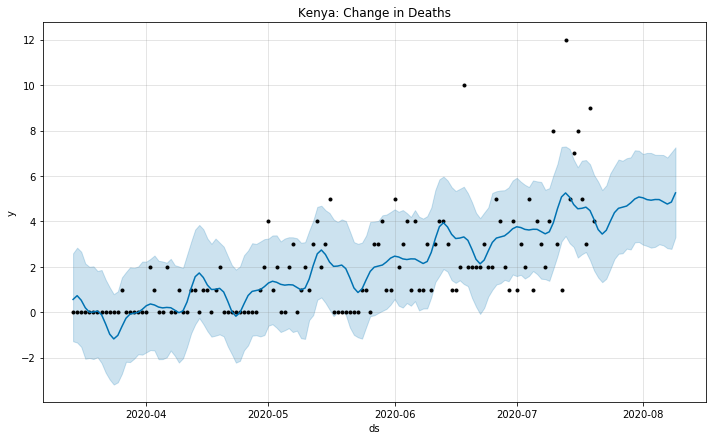

In [86]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Kenya: Change in Deaths')
plt.savefig('Kenya_Change_in_Deaths.jpg', bbox_inches='tight')

In [87]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"},inplace = True)

In [88]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


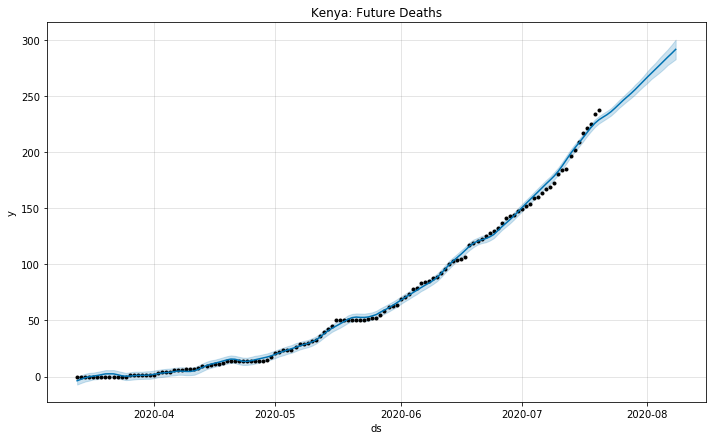

In [89]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Kenya: Future Deaths')
plt.savefig('Kenya_Future_Deaths.jpg', bbox_inches='tight')

In [90]:
ng_df = df.groupby('Country/Region').get_group('Nigeria')
ng_df = ng_df.groupby("ObservationDate")[['Confirmed','Recovered', 'Deaths']].sum()

In [91]:
confirmed_cases = ng_df[['Deaths']]

In [92]:
per_change_confirmed_cases = confirmed_cases.diff()

In [93]:
per_change_confirmed_cases = per_change_confirmed_cases.dropna()
per_change_confirmed_cases = per_change_confirmed_cases.reset_index()
per_change_confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"}, inplace = True)

In [94]:
model_per_change = Prophet(changepoint_prior_scale = 0.1)
model_per_change.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_per_change.fit(per_change_confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


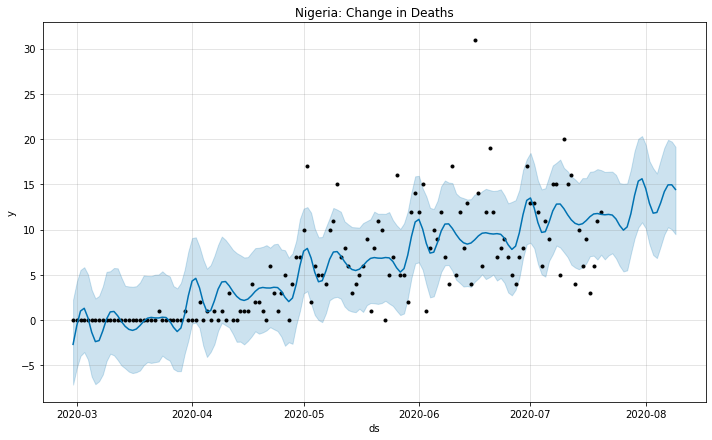

In [95]:
future_dates = model_per_change.make_future_dataframe(periods = 20)
prediction_per_change =  model_per_change.predict(future_dates)
model_per_change.plot(prediction_per_change)
plt.title('Nigeria: Change in Deaths')
plt.savefig('Nigeria_Change_in_Deaths.jpg', bbox_inches='tight')

In [96]:
confirmed_cases = confirmed_cases.reset_index()
confirmed_cases['per_change'] = prediction_per_change['yhat']
confirmed_cases.rename(columns={"ObservationDate":"ds", "Deaths":"y"},inplace = True)

In [97]:
model_cases = Prophet(changepoint_prior_scale = 0.1)
model_cases.add_seasonality(name = "weekly", period = 30, fourier_order = 5)
model_cases.add_regressor('per_change')
model_cases.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


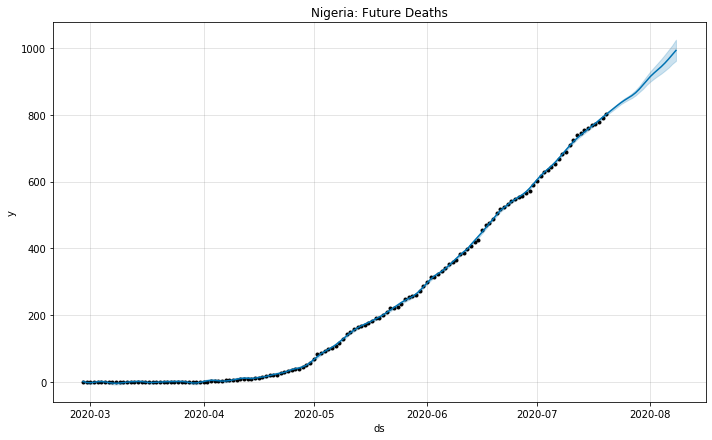

In [98]:
future_dates = model_cases.make_future_dataframe(periods = 20)
future_dates['per_change'] = prediction_per_change['yhat']
future_dates = future_dates.dropna()
prediction_cases =  model_cases.predict(future_dates)
model_cases.plot(prediction_cases)
plt.title('Nigeria: Future Deaths')
plt.savefig('Nigeria_Future_Deaths.jpg', bbox_inches='tight')